In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


import h5py
#from read_raw import load_from_file
import maxlab_analysis as mla

import time
from scipy.signal import find_peaks
import scipy.stats as stats
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
filestem = "20660div7"
filename = filestem + ".data.raw.h5"


In [ ]:
#mla.recording_to_npy(filename, 0, 0)

X, t = mla.load_from_file(filename, 0, 0, 0.2, 10 , 2000)
print(np.shape(X))
print(np.shape(t))
plt.plot(t,X[:,:]);
plt.ylabel('Volts');
plt.xlabel('Seconds');


plt.show()

# plt.savefig('plot.png')

# Burst detection

In [ ]:
Y = mla.load_spikes_from_file(filename, 0, 0, -10)
print(np.shape(Y))

plt.figure(figsize = (10, 10))
plt.scatter(Y['time'], Y['channel'], 0.5)
#plt.scatter(Y_synchronized['frameno'], Y_synchronized['channel'], 1, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Channels')

# PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Plot a subset of the channels
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(t[:], X[:, ::10], linewidth = 0.5)
plt.title('pre scaling')

plt.subplot(122)
plt.plot(t[:], X_scaled[:, ::10], linewidth = 0.5)
plt.title('post scaling')
plt.show()

In [ ]:
n_components = 6

pca = PCA(n_components)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[:, 0], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[:, 1], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.plot(t, X_pca[:, i-1], linewidth = 0.5, alpha = 0.9)
    plt.title('Principal component ' + str(i))
plt.tight_layout()
plt.show()

gif saved
time taken: 175.18942308425903


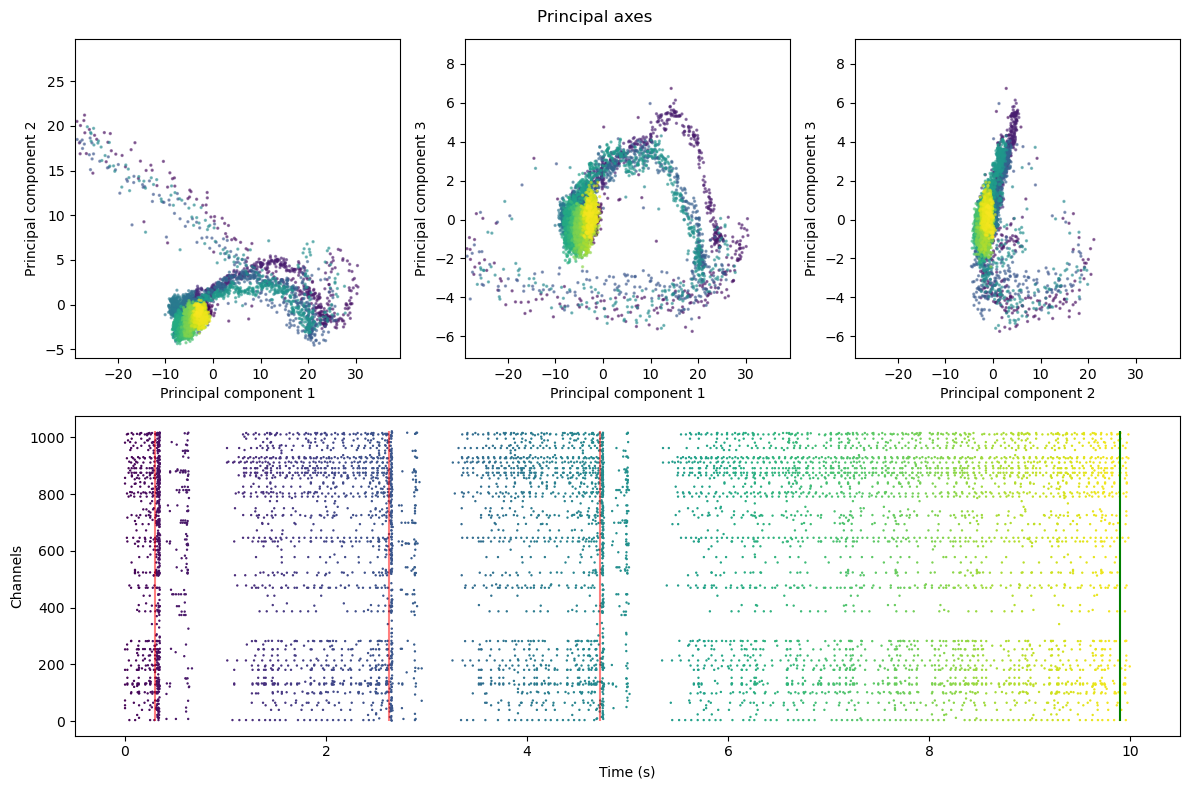

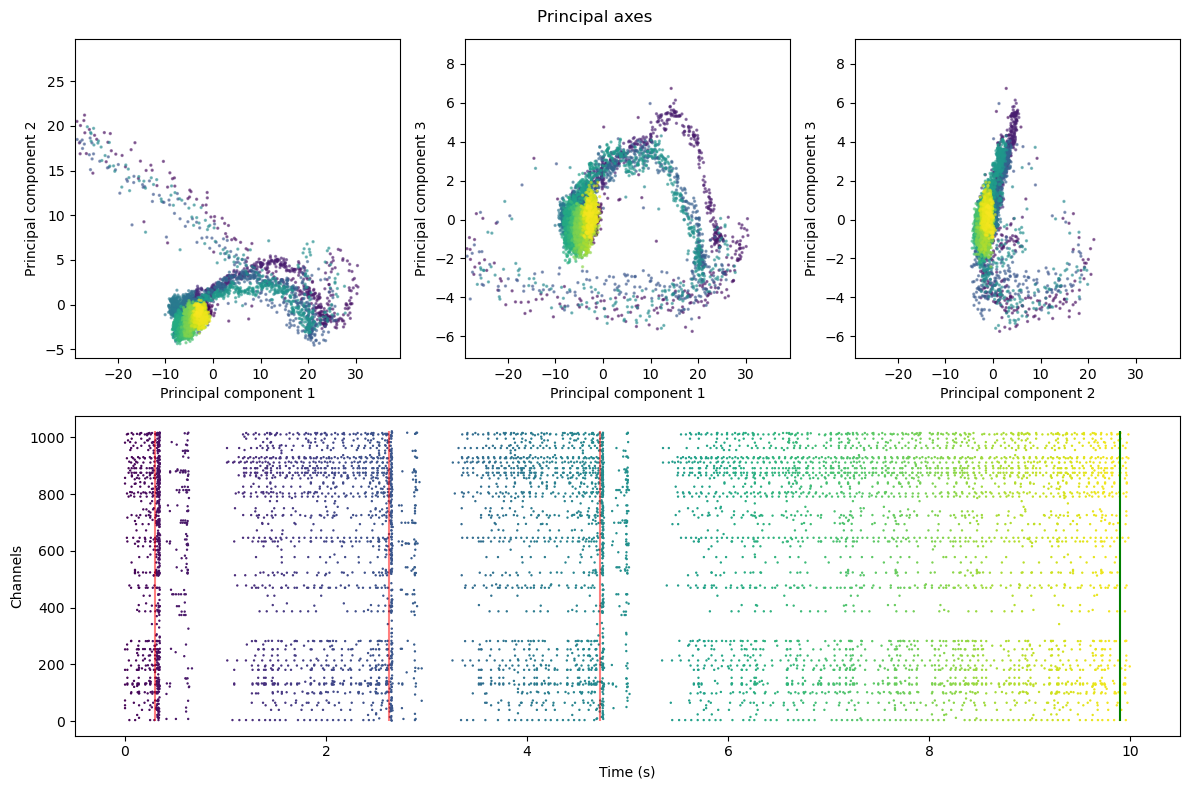

In [2]:
mla.animate_pca('div21', 0, 10, points_per_animation_frame = 62.5, reduce_memory_usage=True)

In [ ]:
# %matplotlib notebook
# fig = plt.figure(figsize = (10, 10))
# ax = plt.axes(projection='3d')
# p = ax.scatter(X_pca[:125000:30, 0], X_pca[:125000:30, 1], X_pca[:125000:30, 2], s = 1, c = t[:125000:30], alpha = 0.5)
# ax.set_xlabel('Principal component 1')
# ax.set_ylabel('Principal component 2')
# ax.set_zlabel('principal component 3')
# fig.colorbar(p)
# plt.tight_layout()
# fig.show()

# NMF

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
%matplotlib inline

#Plot a subset of the channels
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(t[:], X[:, ::10], linewidth = 0.5)
plt.title('pre scaling')

plt.subplot(122)
plt.plot(t[:], X_scaled[:, ::10], linewidth = 0.5)
plt.title('post scaling')
plt.show()

In [ ]:

n_components = 3

nmf = NMF(n_components, max_iter = 800)
X_nmf = nmf.fit_transform(X)#NOTE: does not use the scaled version. It takes a hella long time

print(nmf.n_features_in_)

In [ ]:
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_nmf[:, 0], X_nmf[:, 1],  s = 1, c = t, alpha = 0.5)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')

plt.subplot(132)

plt.scatter(X_nmf[:, 0], X_nmf[:, 2],  s = 1, c = t, alpha = 0.5)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 3')

plt.subplot(133)
plt.scatter(X_nmf[:, 1], X_nmf[:, 2],  s = 1, c = t, alpha = 0.5)
plt.colorbar()
plt.xlabel('NMF component 2')
plt.ylabel('NMF component 3')
plt.tight_layout()
plt.show()


fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.plot(t, X_nmf[:, i-1], linewidth = 0.5, alpha = 0.9)
    plt.title('NMF component ' + str(i))
plt.tight_layout()
plt.show()

In [ ]:

n_components = 3

nmf = NMF(n_components, max_iter=2000) #enough to converge!
X_nmf_scaled = nmf.fit_transform(X_scaled)

print(nmf.n_features_in_)

In [ ]:
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_nmf_scaled[:, 0], X_nmf_scaled[:, 1],  s = 1, c = t, alpha = 0.5)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 2')

plt.subplot(132)

plt.scatter(X_nmf_scaled[:, 0], X_nmf_scaled[:, 2],  s = 1, c = t, alpha = 0.5)
plt.xlabel('NMF component 1')
plt.ylabel('NMF component 3')

plt.subplot(133)
plt.scatter(X_nmf_scaled[:, 1], X_nmf_scaled[:, 2],  s = 1, c = t, alpha = 0.5)
plt.colorbar()
plt.xlabel('NMF component 2')
plt.ylabel('NMF component 3')
plt.tight_layout()
plt.show()


fig_width = 3
plt.figure(figsize = (fig_width * 5, (int(np.ceil(n_components/fig_width)) * 5)))
for i in np.arange(1, n_components + 1):
    plt.subplot(int(np.ceil(n_components/fig_width)), fig_width, i)
    plt.plot(t, X_nmf_scaled[:, i-1], linewidth = 0.5, alpha = 0.9)
    plt.title('NMF component ' + str(i))
plt.tight_layout()
plt.show()